In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import missingno as msno
from scipy import stats
from scipy.stats import norm, skew

### read data into dataframes

In [8]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

### number of samples & number of features

In [9]:
print(f"Initial test data size is: {test_df.shape}")
print(f"Initial train data size is: {train_df.shape}")

Initial test data size is: (1459, 80)
Initial train data size is: (1460, 81)


### drop ID columns since it does not tell anything

In [10]:
if 'Id' in train_df.columns:
    train_df.drop('Id', axis=1, inplace=True)
if 'Id' in test_df.columns:
    test_df.drop('Id', axis=1, inplace=True)
print(f"Dropping ID feature, test data size is: {test_df.shape}")
print(f"Dropping ID feature, train data size is: {train_df.shape}")

Dropping ID feature, test data size is: (1459, 79)
Dropping ID feature, train data size is: (1460, 80)


### checking missing values

In [21]:
percentmissingvalues=(train_df.isnull().sum() / train_df.shape[0]).sort_values(ascending=False)
print(percentmissingvalues)
msno.bar(train_df)
msno.heatmap(train_df)

SyntaxError: invalid syntax (<ipython-input-21-c0665cd28d32>, line 1)

### check column types

In [ ]:
train_df_column_types=train_df.dtypes.value_counts()
type_dct={str(k):list(v) for k,v in train_df.groupby(train_df.dtypes,axis=1)}
print()
print(f'Count of column data types: \n{train_df_column_types}\n')
print(f'Classification of feature by data type:\n{type_dct}\n')
print()

### list of variables that contain year information

In [ ]:
numeric_features=train_df.select_dtypes(include=[np.number])
datetime_features=[x for x in numeric_features if 'Year' in x or 'Yr' in x]
print(f'Year features include:\n{datetime_features}\n')

### univariate visualisation

In [35]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

TypeError: 'str' object is not callable

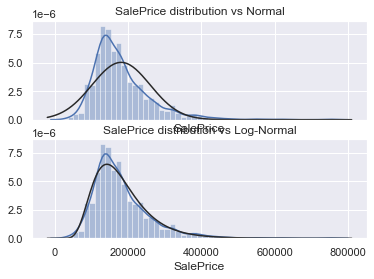

In [86]:
fig, axs = plt.subplots(2,1,sharex=True,sharey=True)
sns.distplot(train_df['SalePrice'],fit=norm,ax=axs[0])
#ax[0].set_ylabel('Frequency')
axs[0].set_title('SalePrice distribution vs Normal')

sns.distplot(train_df['SalePrice'],fit=stats.lognorm,ax=axs[1])
#ax[1].set_ylabel('Frequency')
axs[1].set_title('SalePrice distribution vs Log-Normal')

plt.ylabel('common ylabel')
plt.show()
#QQ plot
#plt.figure()
#res=stats.probplot(train_df['SalePrice'])
#plt.show()

### compare Year features with SalePrice

In [ ]:
for x in datetime_features:
    train_df_copy=train_df.copy()
    plt.scatter(train_df_copy[x],train_df_copy['SalePrice'])
    plt.xlabel(x)
    plt.ylabel('SalePrice')
    plt.show()